In [1]:
# Setting up the environment.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter
from cycler import cycler

In [39]:
# Load the data from the John Hopkins github repo
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
dfd = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
# Set some variables to update to latest date added
latest = "3/22/20"
latestConfirmed = "Confirmed (3/22/20)"
latestDeaths = "Deaths (3/22/20)"

In [40]:
df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [41]:
dfd.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,19,22,22,27,29,29,29,33,35,40
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,2,2,2,3,4,10


In [42]:
# Dropping some columns and renaming for the confirmed table
df1 = df[["Province/State", "Country/Region", latest]]
df1 = df1[(df1["Country/Region"] == "US")]
df1 = df1.sort_values(by=[latest], ascending=False)
df1 = df1[df1[latest] !=0]
df1 = df1.rename(columns={latest: latestConfirmed})
df1.head(5)

,Province/State,Country/Region,Confirmed (3/22/20)
99,New York,US,15793
98,Washington,US,1996
107,New Jersey,US,1914
100,California,US,1642
110,Illinois,US,1049


In [43]:
# Adding the deaths table
dfd1 = dfd[["Province/State", "Country/Region", latest]]
dfd1 = dfd1[(dfd1["Country/Region"] == "US")]
dfd1 = dfd1.sort_values(by=[latest], ascending=False)
dfd1 = dfd1[dfd1[latest] !=0]
dfd1 = dfd[[latest]]
dfd1 = dfd1.rename(columns={latest: latestDeaths})
dfd1.head(5)

,Deaths (3/22/20)
0,1
1,40
2,2
3,0
4,10


In [44]:
# Merging the confirmed and deaths tables
df1cd = df1.merge(dfd1, left_index=True, right_index=True)
df1cd.head(5)

,Province/State,Country/Region,Confirmed (3/22/20),Deaths (3/22/20)
99,New York,US,15793,117
98,Washington,US,1996,95
107,New Jersey,US,1914,20
100,California,US,1642,30
110,Illinois,US,1049,9


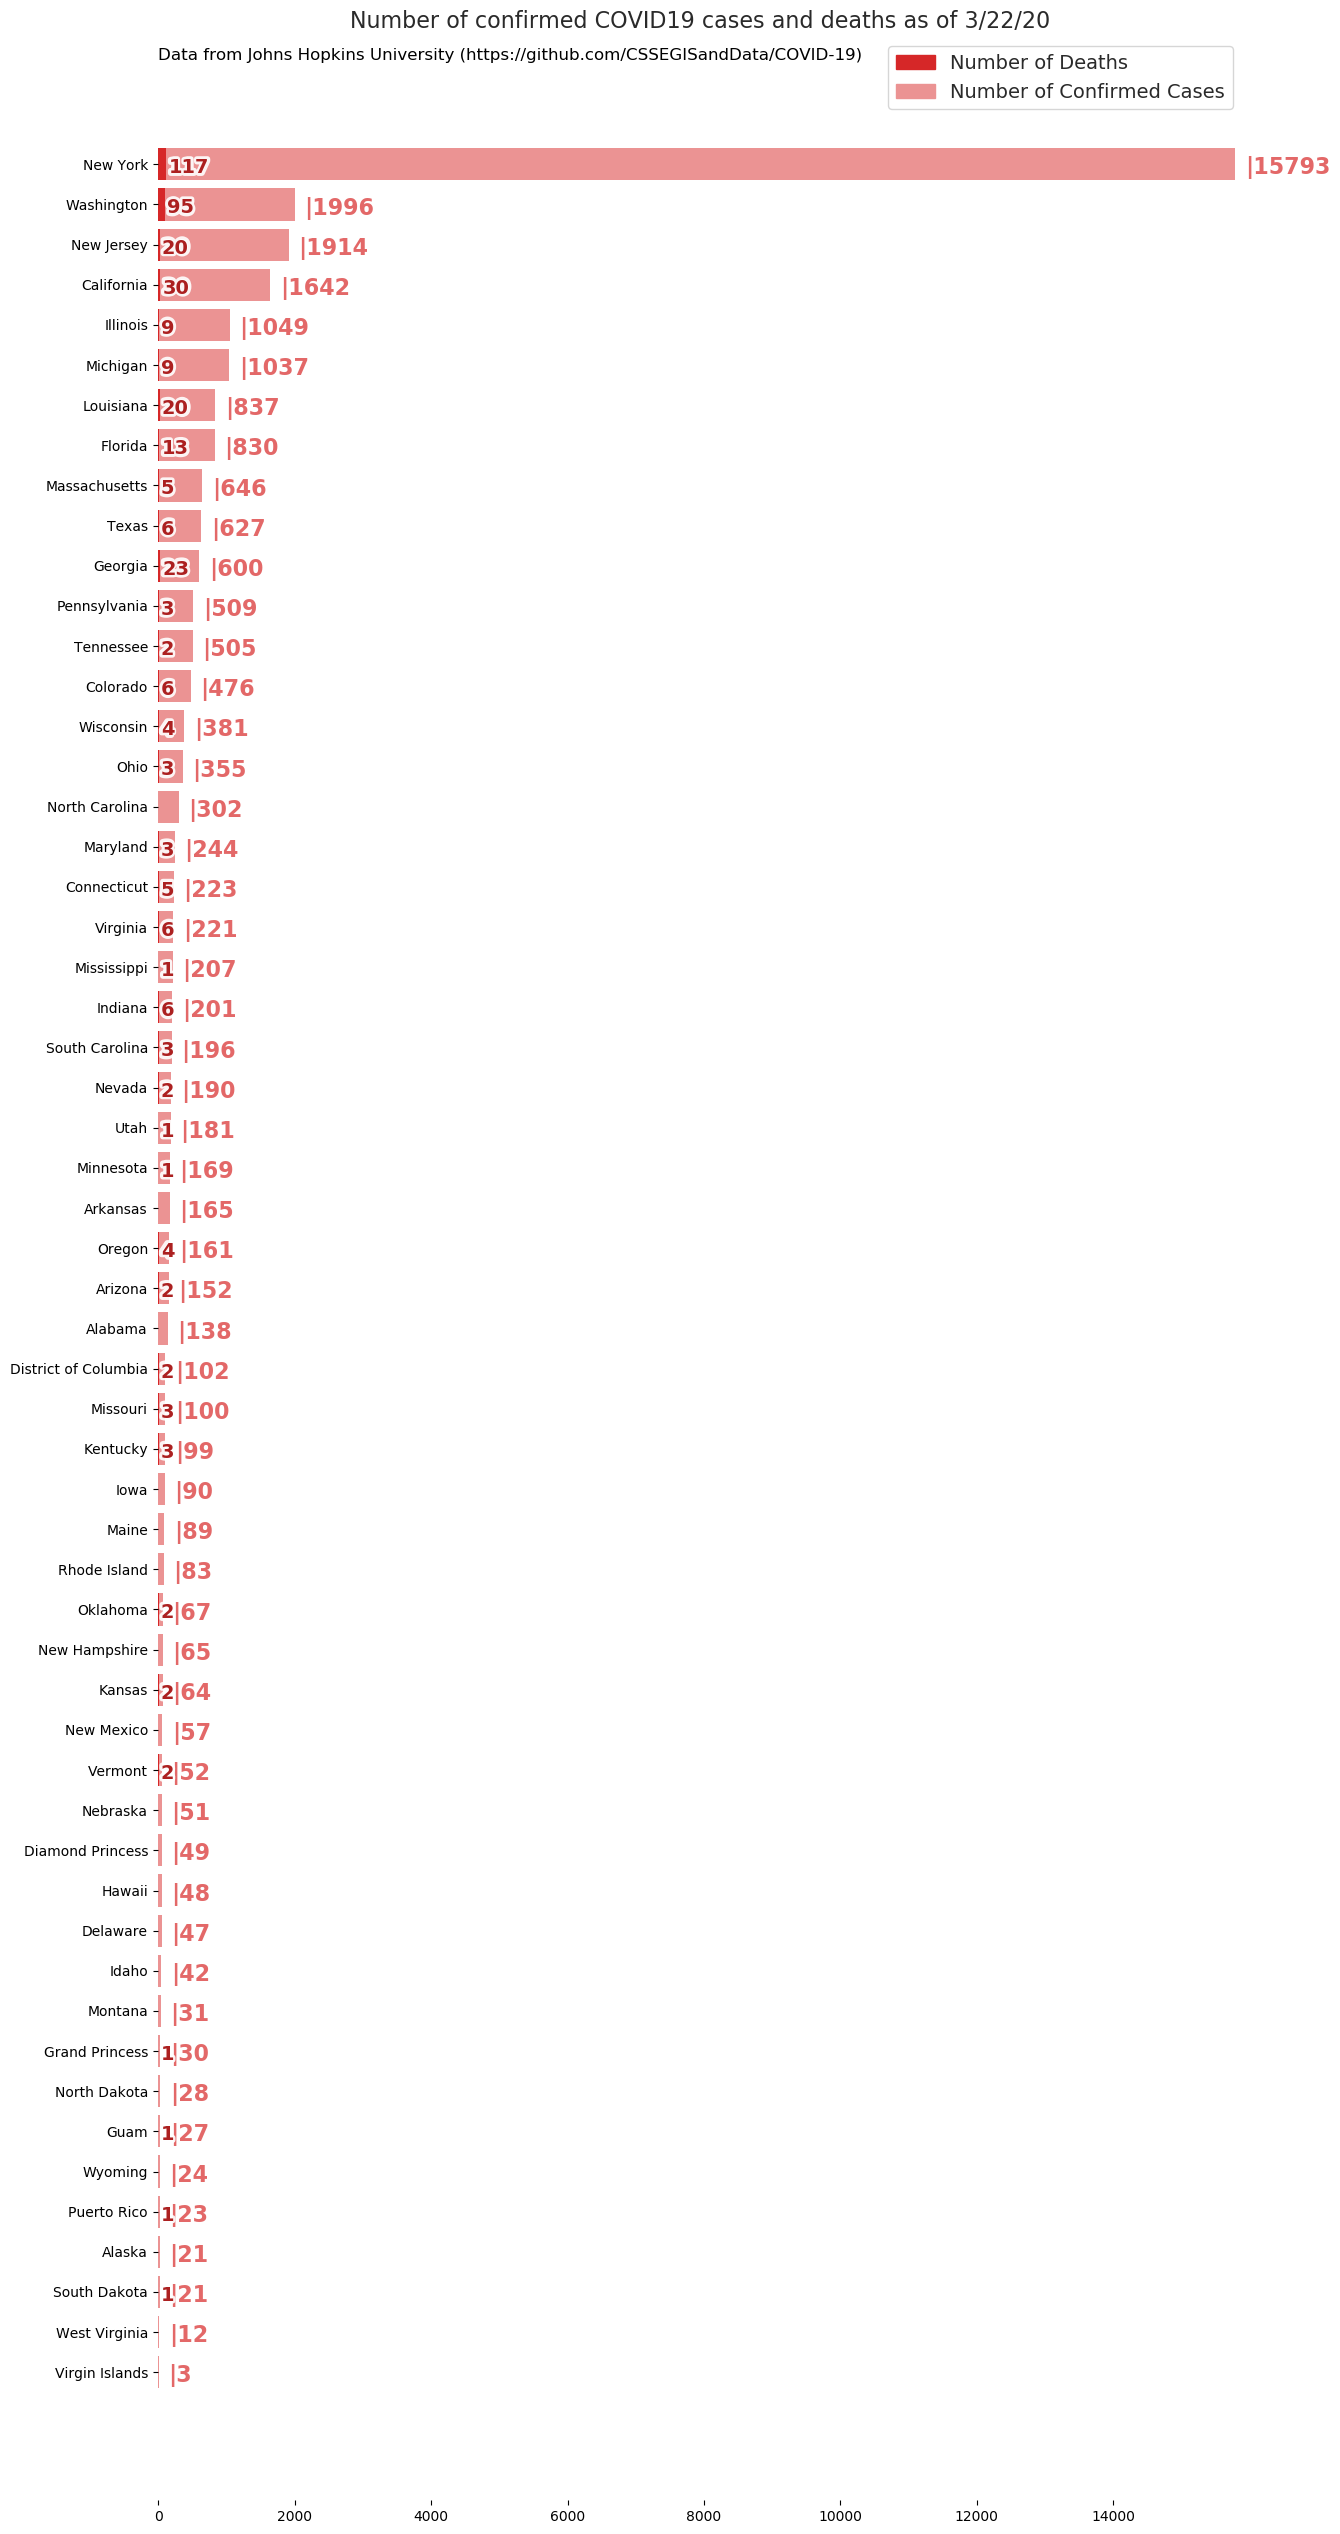

In [55]:
# Horzontal Bar Chart
fig, ax = plt.subplots()
plt.style.use('default')
# This is the sub-title
ax.text(0,-2.6,'Data from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19)', fontsize=12)
plt.rcParams['axes.labelsize'] = 26
# Making chart borders invisible
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
mpl.rcParams['text.color'] = '#2a2a2a'

# This is used to put the white stroke on the text for deaths
import matplotlib.patheffects as path_effects

# Inverting axis so the largest bar is at the top
ax.invert_yaxis()

ax.barh(df1cd["Province/State"], df1cd[latestConfirmed], color="#eb9393")
for i, v in enumerate(df1cd[latestConfirmed]):
    ax.text(v + 140, i + 0.25, "|" + str(v), color='#e36868', fontweight='bold', fontsize=16)
    
# Draws the Confirmed chart
ax.barh(df1cd["Province/State"], df1cd[latestDeaths], color="#d62728")
# This is the text for deaths with the path effect to give the text a stroke
for i, v in enumerate(df1cd[latestDeaths]):
    text = str(v)
    if v == 0:
       text = ""
    ax.text(v + 30, i + 0.22, text, color='white', fontweight='bold', fontsize=14, path_effects=[path_effects.Stroke(linewidth=4, foreground='white', alpha=0.9)])

# This is the red text for deaths, which is on top of the white text
# If you just use the stroke it doesn't look good so you have to render it again
for i, v in enumerate(df1cd[latestDeaths]):
    text = str(v)
    if v == 0:
        text = ""
    ax.text(v + 30, i + 0.22, text, color='#ac2020', fontweight='bold', fontsize=14)

# This draws the axis. You need to make it bigger if there are more confirmed cases - now 11800
labels = ax.get_xticklabels()
ax.set(xlim=[-10, 15900])

# Title of chart
ax.set_title('Number of confirmed COVID19 cases and deaths as of {}'.format(latest), fontsize=16)

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 14 and height to 32
fig_size[0] = 14
fig_size[1] = 32
plt.rcParams["figure.figsize"] = fig_size

# This is for the key
import matplotlib.patches as mpatches
deaths = mpatches.Patch(color='#d62728', label='Number of Deaths')
confirmed = mpatches.Patch(color='#eb9393', label='Number of Confirmed Cases')
ax.legend(handles=[deaths, confirmed], fontsize=14)

# Saving as png
plt.savefig('COVID19_US_03-23-20.png')

In [47]:
dfonlyvalues = df.drop(['Province/State','Country/Region','Lat', 'Long'], axis=1)
dfonlyvalues.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,2,3,5,7,8,8,14,14,14,19,...,75,82,114,147,177,212,272,322,411,599
1,2,1,2,2,4,4,7,7,11,15,...,701,773,839,825,878,889,924,963,1007,1086
2,0,1,3,3,4,5,7,7,10,13,...,200,212,226,243,266,313,345,385,432,455
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,0,0,0,3,4,4,4,7,8,8,...,197,238,428,566,673,790,900,1030,1183,1306


In [48]:
# this cell by Leaf Petersen
# Copy the data frame
dfdaily=dfonlyvalues.copy()

# We are on the first iteration
first=True
# For every column
for column in dfonlyvalues:
   # If this is the first iteration
   if first:
     # Save the first column
     prev = column
     # Copy over the first column unchanged
     dfdaily[column]=dfonlyvalues[column]
     # All subsequent iterations are not the first
     first=False
     # Skip the rest of the loop
     continue
   # We are not the first iteration, so keep going
   # Set the new column contents to the difference of the
   # previous column and the current column
   dfdaily[column] = dfonlyvalues[column]-dfonlyvalues[prev]
   # The current column is the previous column for the next iteration
   prev = column
dfdaily.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,2,1,2,2,1,0,6,0,0,5,...,5,7,32,33,30,35,60,50,89,188
1,2,-1,1,0,2,0,3,0,4,4,...,62,72,66,-14,53,11,35,39,44,79
2,0,1,2,0,1,1,2,0,3,3,...,22,12,14,17,23,47,32,40,47,23
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,3,1,0,0,3,1,0,...,48,41,190,138,107,117,110,130,153,123


In [49]:
dfstct = dfd[["Province/State", "Country/Region"]]
dfstct.head(5)

,Province/State,Country/Region
0,NaN,Thailand
1,NaN,Japan
2,NaN,Singapore
3,NaN,Nepal
4,NaN,Malaysia


In [50]:
dfdaily2 = dfstct.merge(dfdaily, left_index=True, right_index=True)
dfdaily2 = dfdaily2[(dfdaily2["Country/Region"] == "US")]
dfdaily2 = dfdaily2.drop(['Country/Region'], axis=1)
dfdaily2.head(5)

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
98,Washington,0,0,0,0,0,0,0,0,0,...,126,4,71,261,172,-62,362,148,269,203
99,New York,0,0,0,0,0,0,0,0,0,...,93,104,207,235,739,789,2870,2945,3400,4083
100,California,0,0,0,0,0,0,0,0,0,...,61,58,86,131,141,53,201,225,187,278
101,Massachusetts,0,0,0,0,0,0,0,0,0,...,15,15,26,33,21,0,110,85,112,121
102,Diamond Princess,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,0


In [51]:
dfWA = dfdaily2[dfdaily2["Province/State"] == "Washington"]
dfWA = dfWA.drop(['Province/State'], axis=1)
dfWA = dfWA.T #transposing
dfWA = dfWA.rename(columns={98: 'Confirmed Cases in Washington'})
dfWA = dfWA.reset_index()
dfWA = dfWA.rename(columns={'index': 'Date'})
dfWA.tail(5)

,Date,Confirmed Cases in Washington
56,3/18/20,-62
57,3/19/20,362
58,3/20/20,148
59,3/21/20,269
60,3/22/20,203


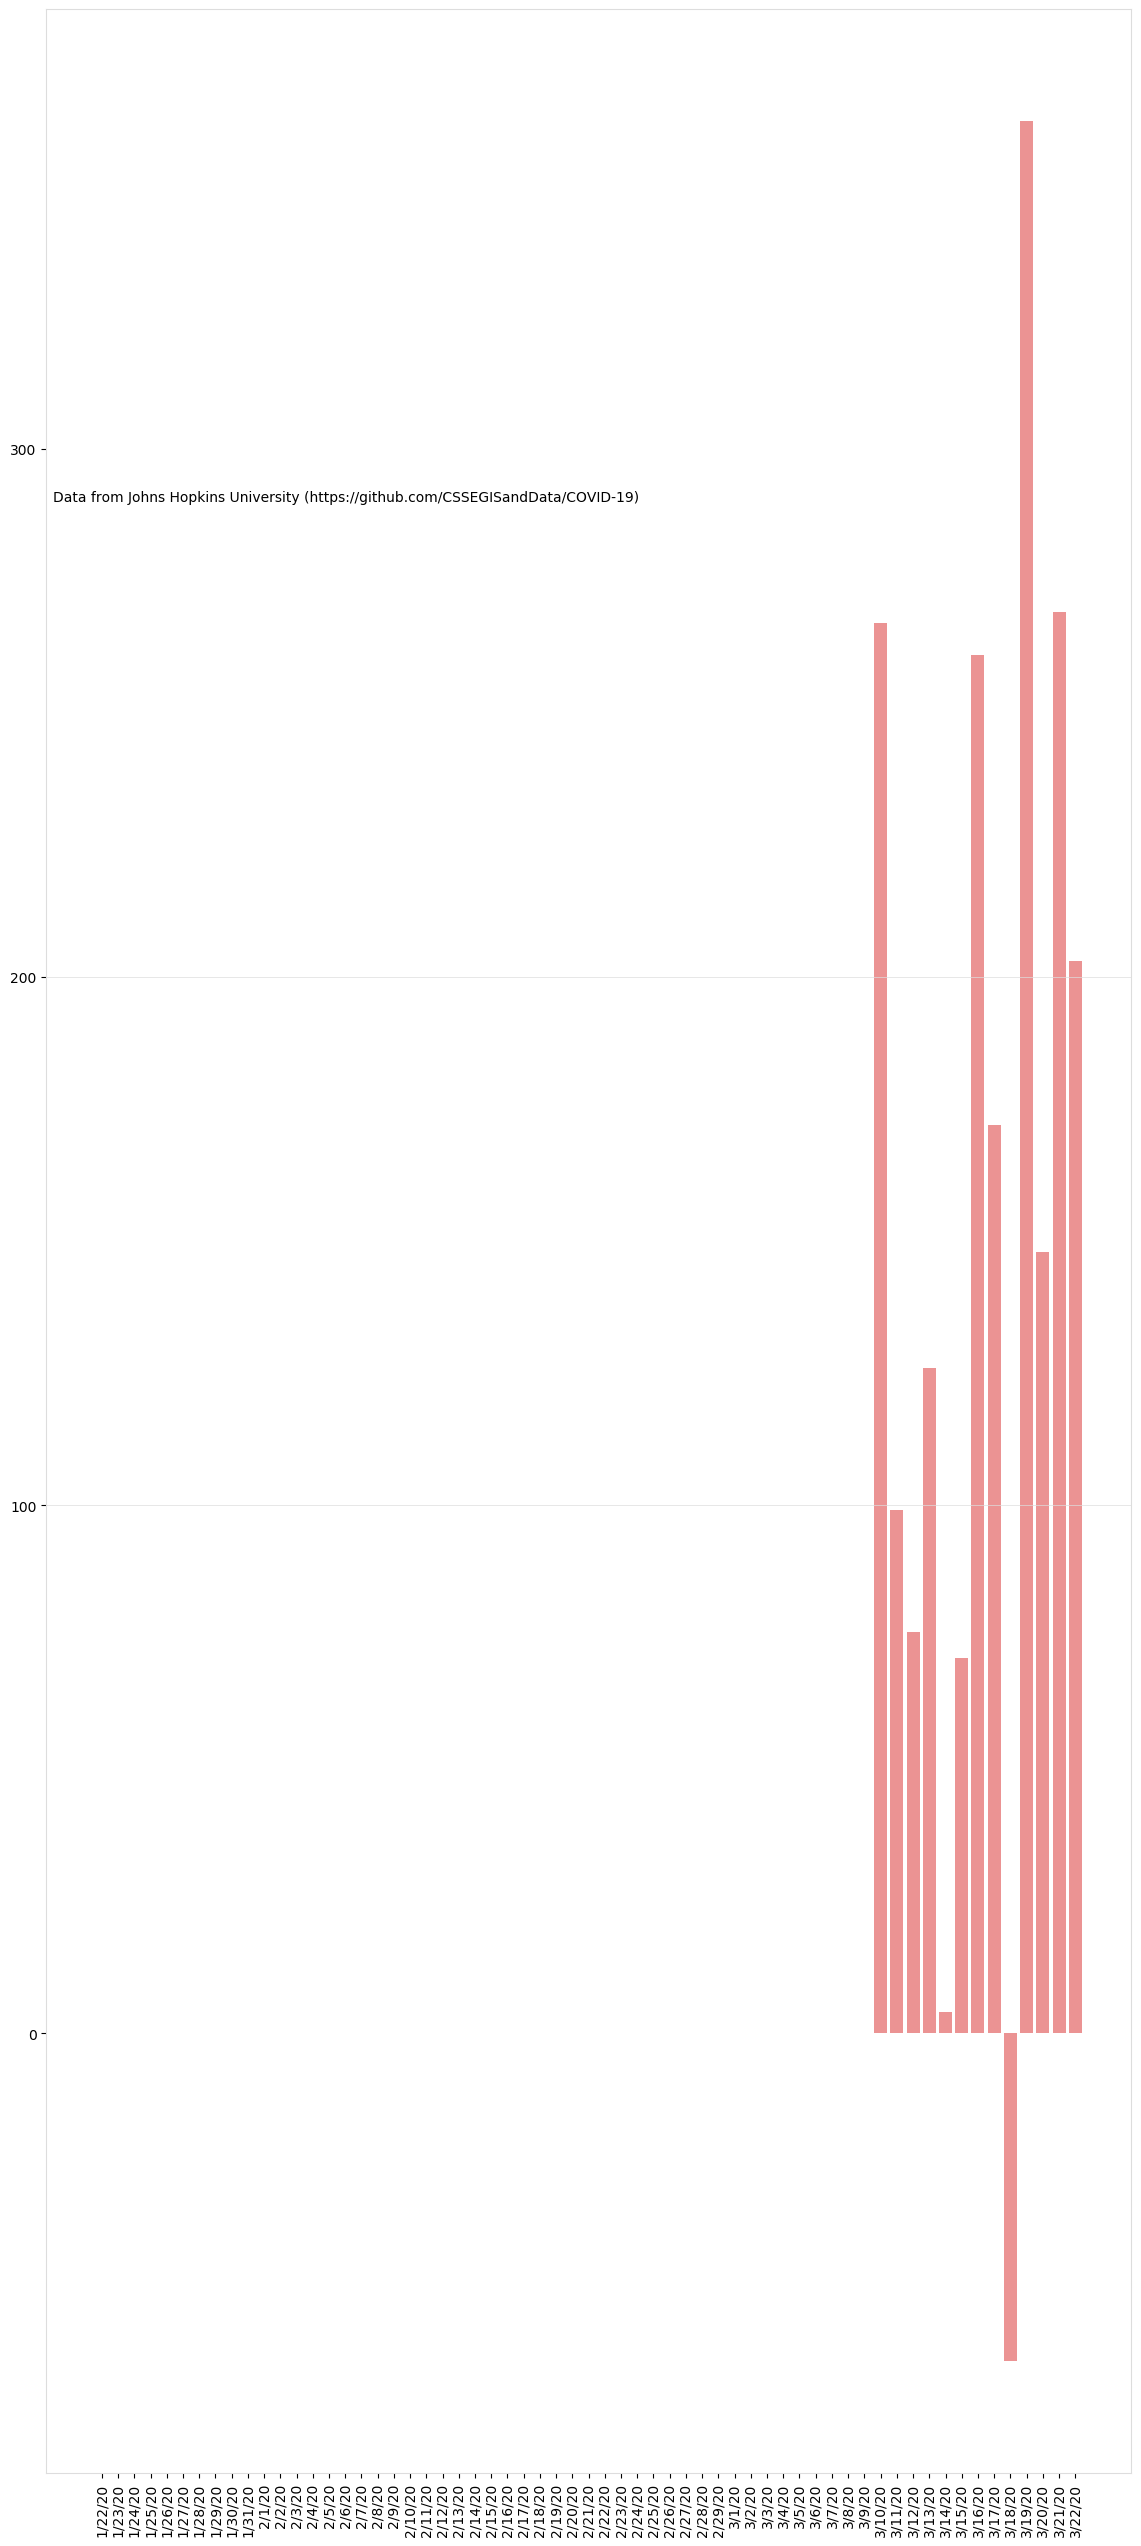

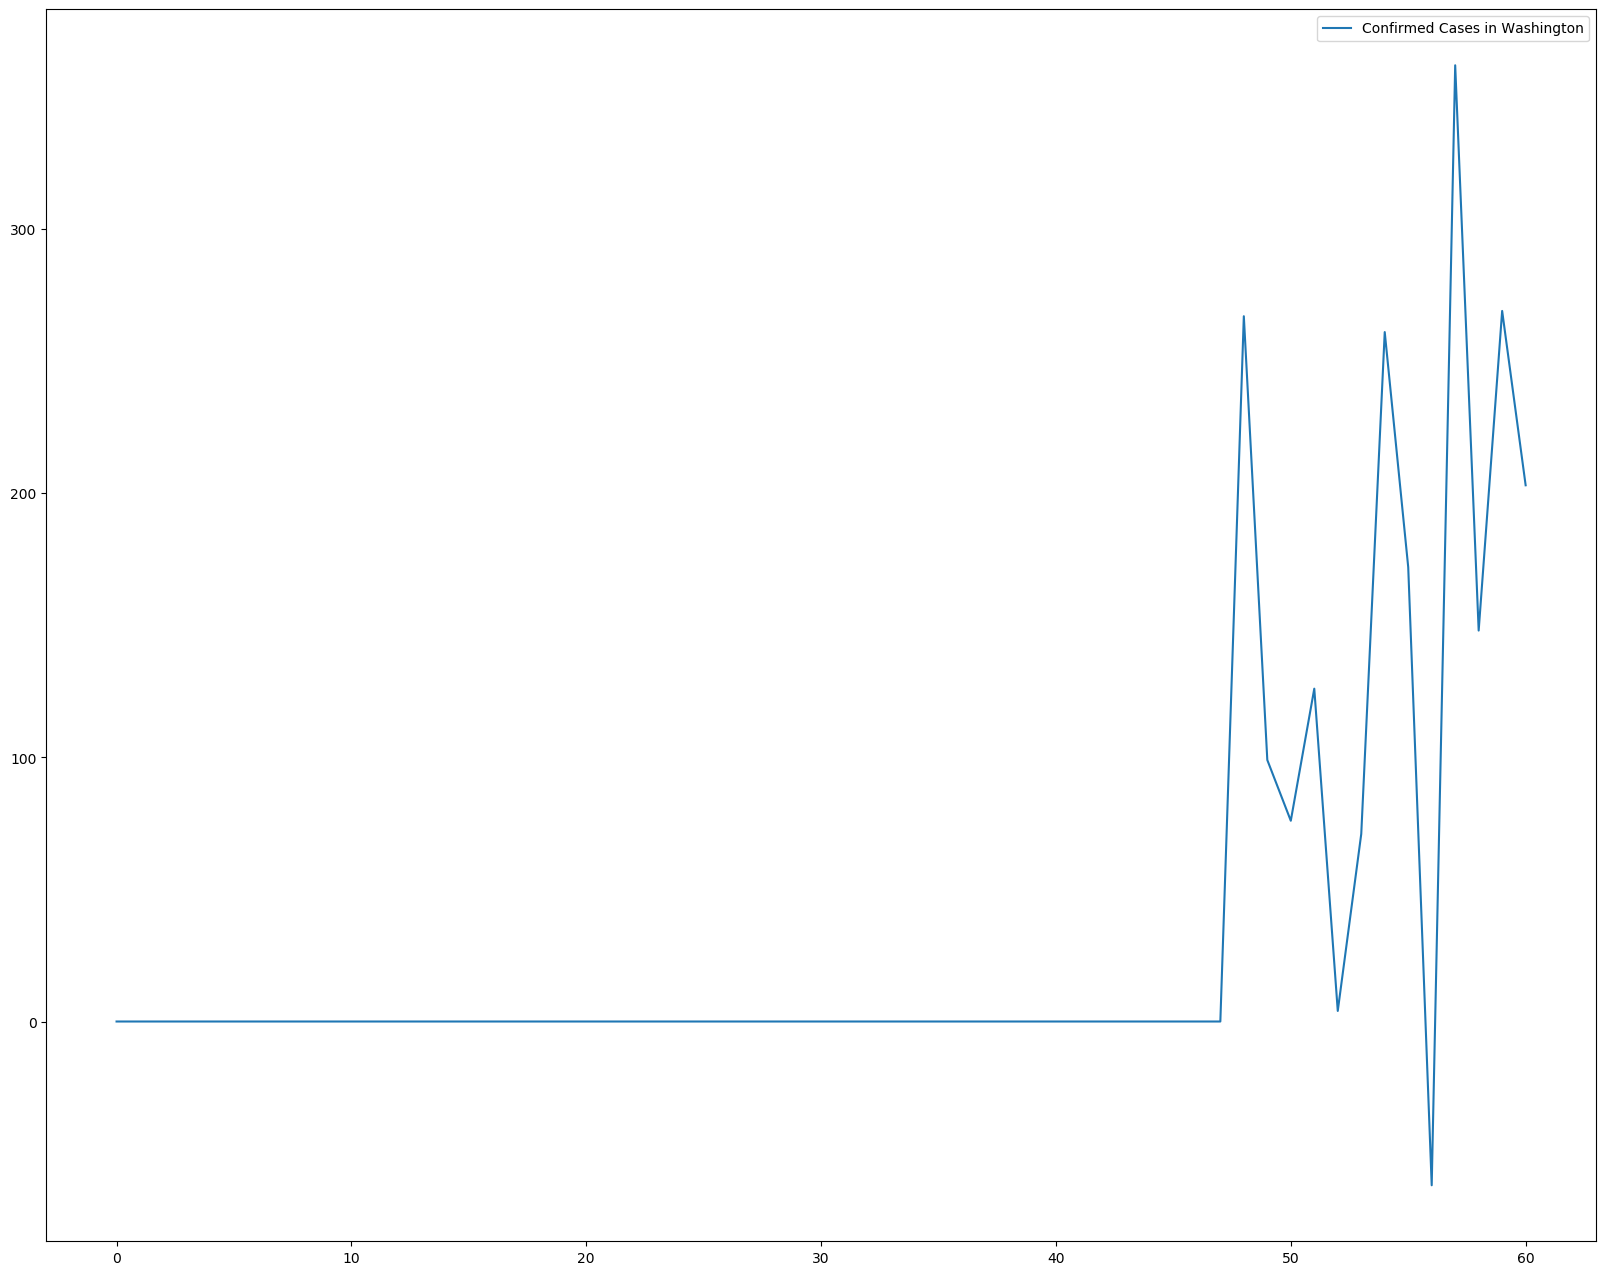

In [52]:
fig, ax = plt.subplots()
plt.style.use('default')
ax.text(-3,290,'Data from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19)', fontsize=10)

# Set figure width and height
fig_size[0] = 20
fig_size[1] = 16
plt.rcParams["figure.figsize"] = fig_size

# Set variables for bar plot
date = dfWA['Date']
y_pos = np.arange(len(date))
cases = dfWA['Confirmed Cases in Washington']

# add the bar plot
ax.bar(y_pos, cases, align='center', color='#eb9393')
plt.xticks(y_pos, date, rotation='vertical')

#add horizontal lines
plt.axhline(y=100,linewidth=0.5, color='#dddddd')
plt.axhline(y=200,linewidth=0.5, color='#dddddd')

# add line plot
dfWA.plot.line()

#change color of borders
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

plt.show()